# Libs

In [ ]:
!pip install ultralytics
!pip install supervision
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.5/644.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import sys
from ultralytics import YOLO
import supervision as sv
from roboflow import Roboflow

In [ ]:
#rf = Roboflow(api_key="AkX5RkNGun05ErGtKWU2")
rf = Roboflow(api_key="pyKYqQ0zML42RC6BjeNA")
project = rf.workspace("ml-k9qjo").project("driver-sleep-awake")
dataset = project.version(6).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.200, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Driver-Sleep-Awake-6 in yolov8:: 100%|██████████| 2558/2558 [00:00<00:00, 3268.62it/s]


# Treinar

In [ ]:
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 185MB/s]


In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model=yolov8n.pt epochs=10 imgsz=640

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Driver-Sleep-Awake-6/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

# Mostrar resultados

In [ ]:
!yolo task=detect mode=val data={dataset.location}/data.yaml model=/content/runs/detect/train3/weights/best.pt

Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Driver-Sleep-Awake-6/valid/labels.cache... 87 images, 0 backgrounds, 0 corrupt: 100% 87/87 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:03<00:00,  1.78it/s]
                   all         87         87      0.818      0.939      0.954      0.754
                 awake         87         49      0.837      0.939      0.956       0.74
                drowsy         87         38      0.799      0.939      0.952      0.769
Speed: 4.2ms preprocess, 7.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/val4
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict source={dataset.location}/test/images save_txt=true conf=0.5 model=/content/runs/detect/train3/weights/best.pt

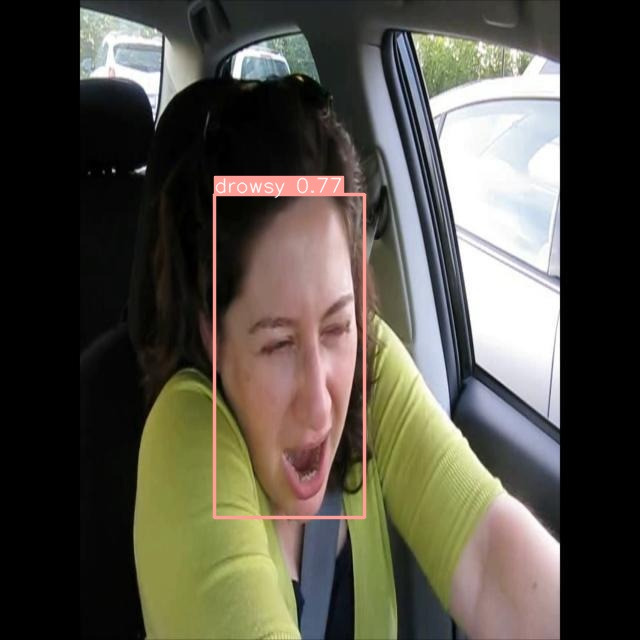

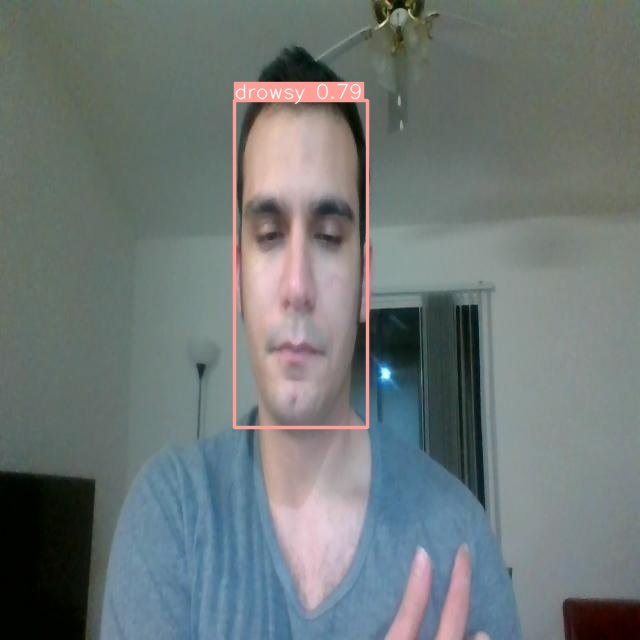

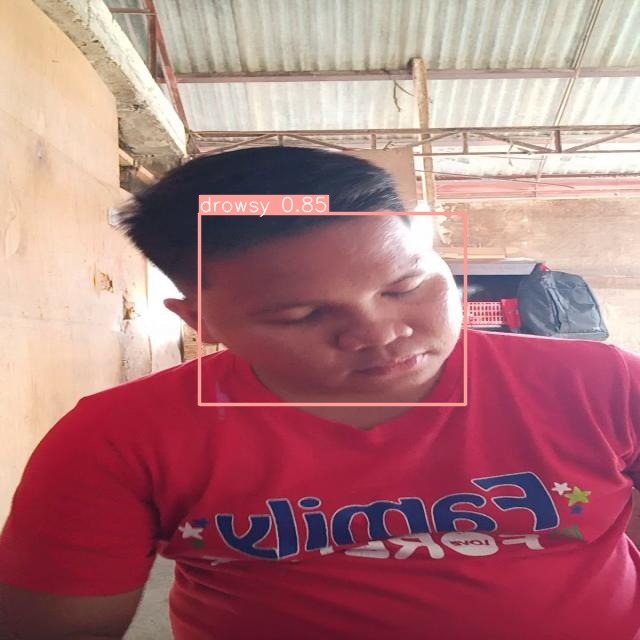

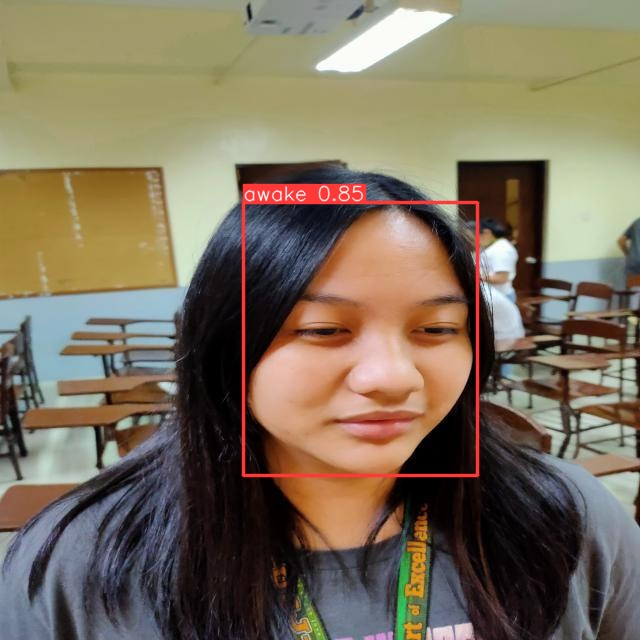

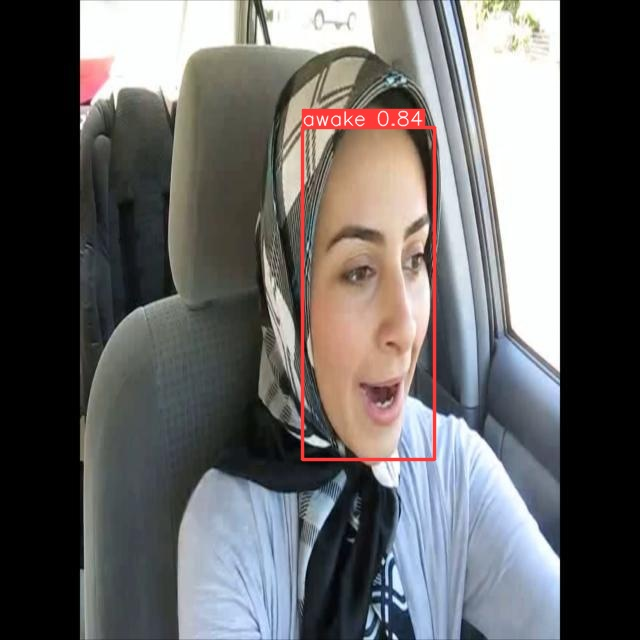

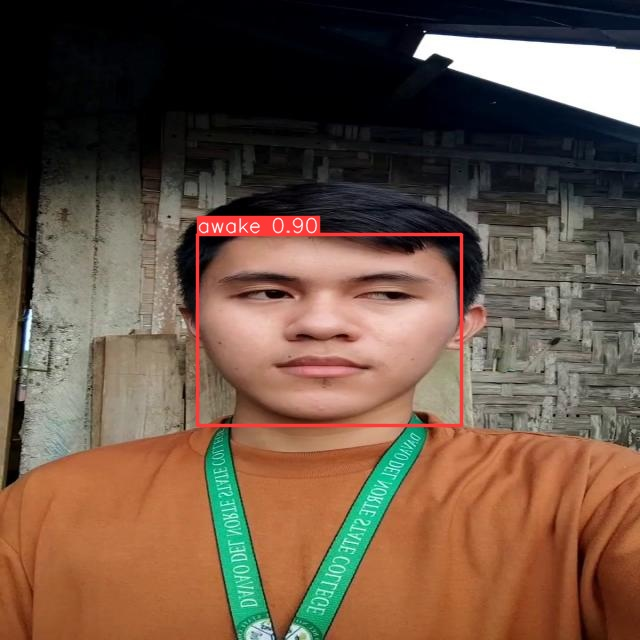

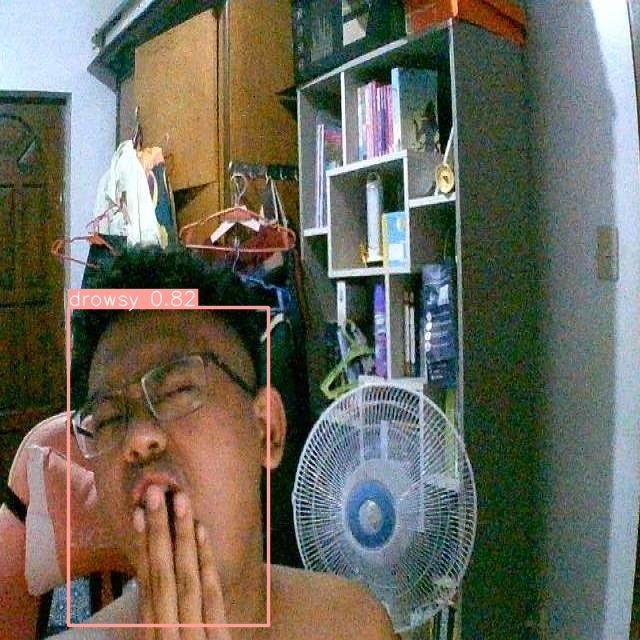

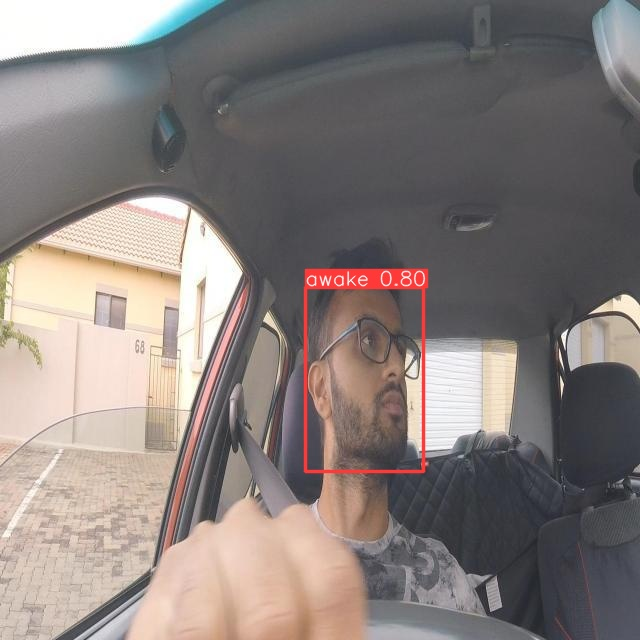

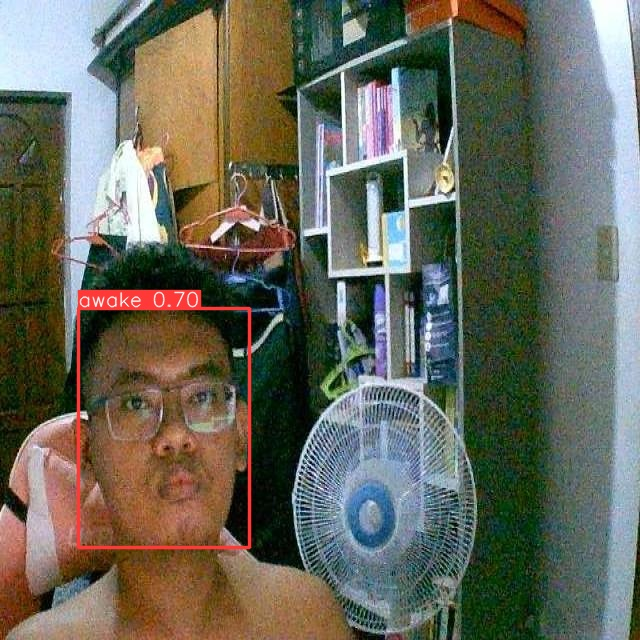

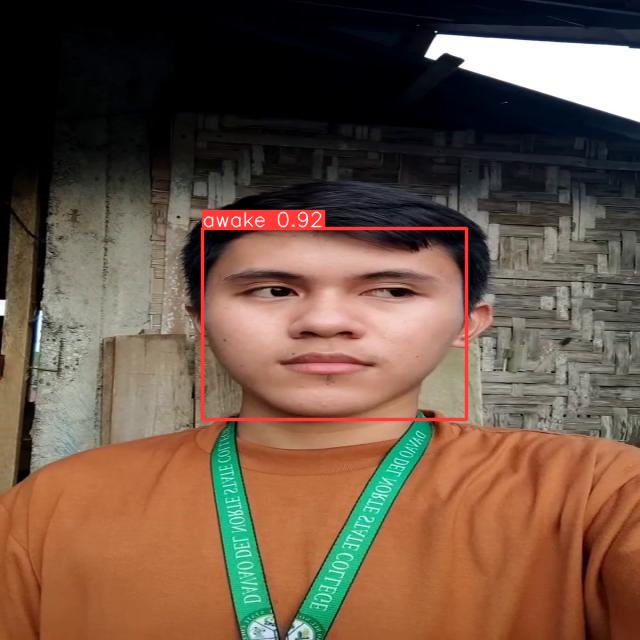

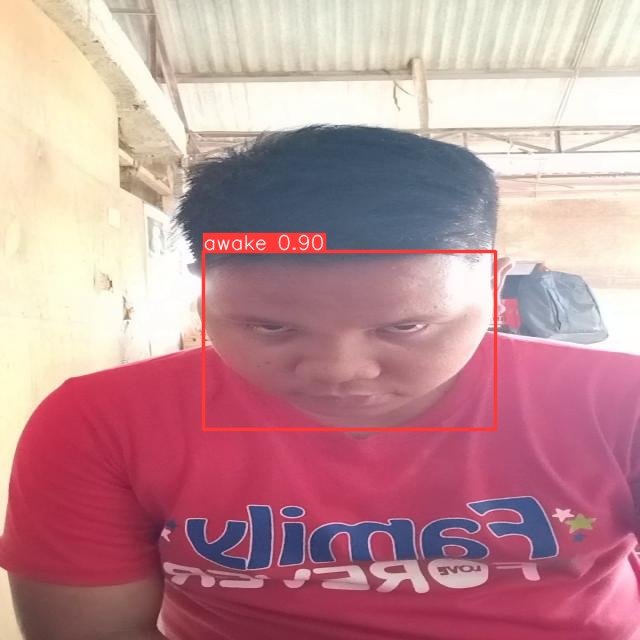

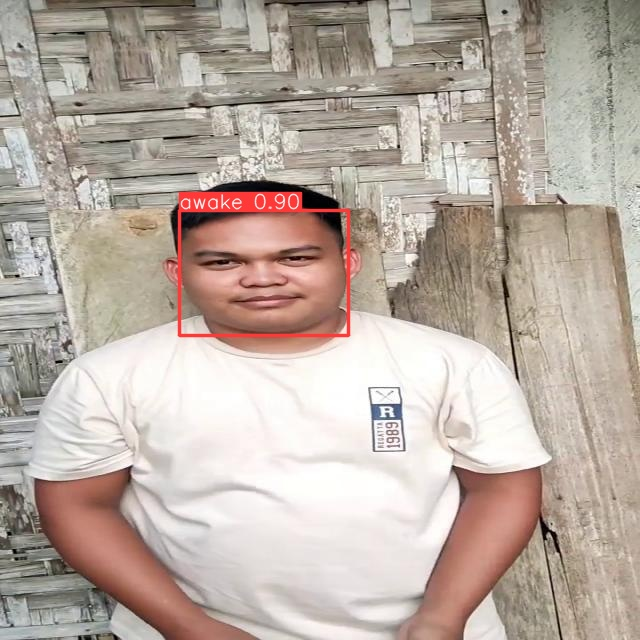

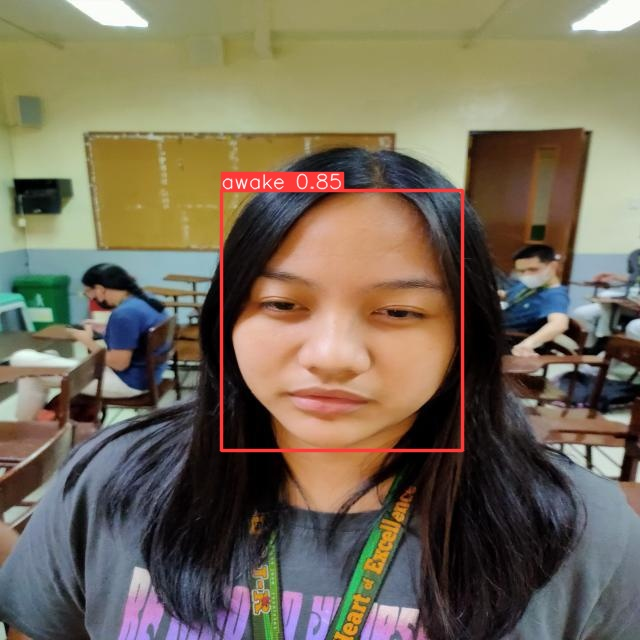

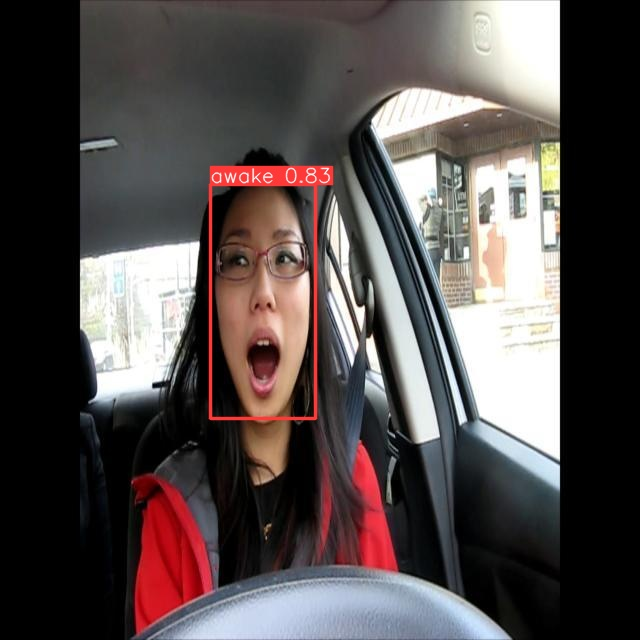

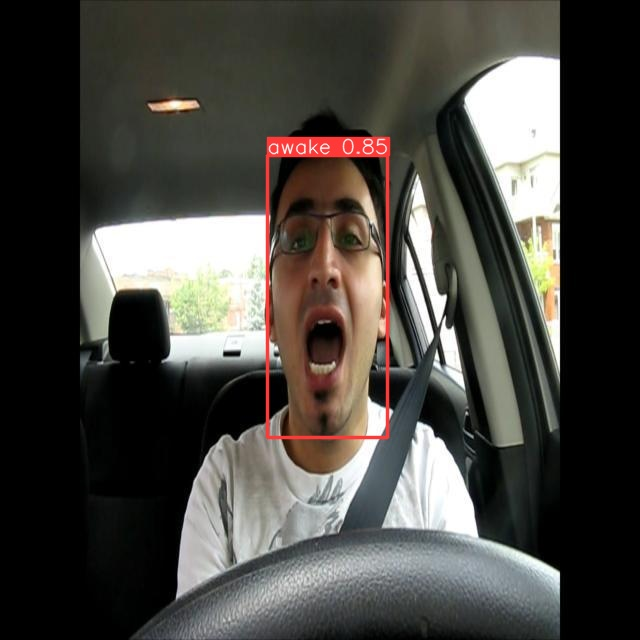

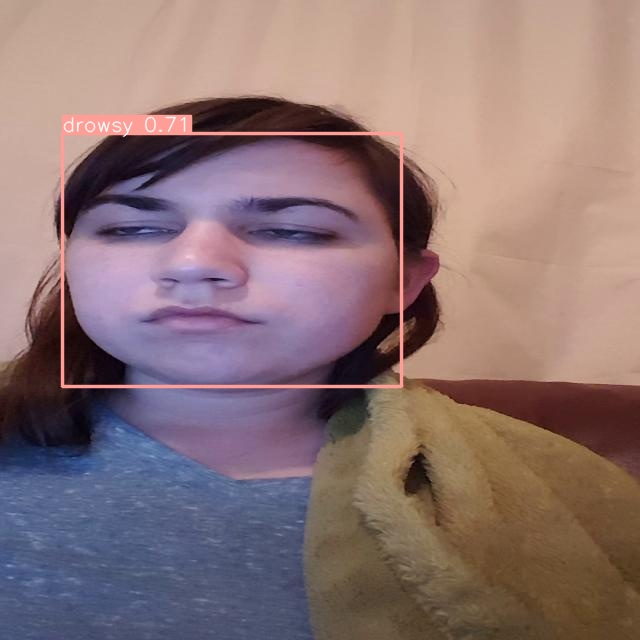

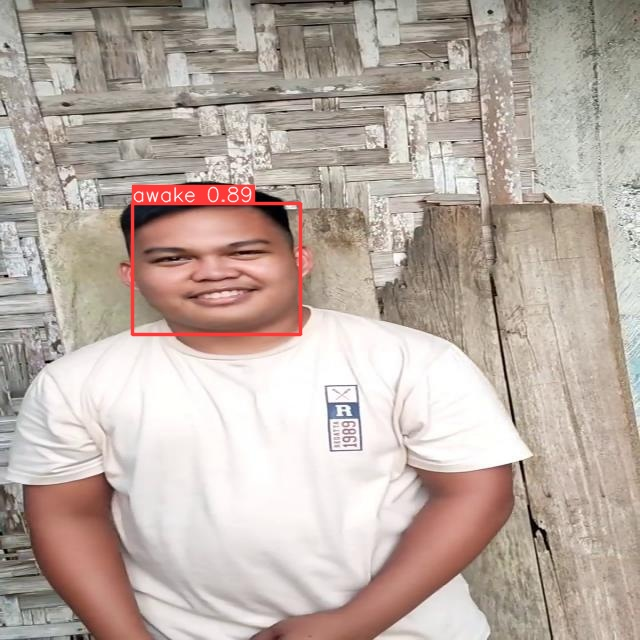

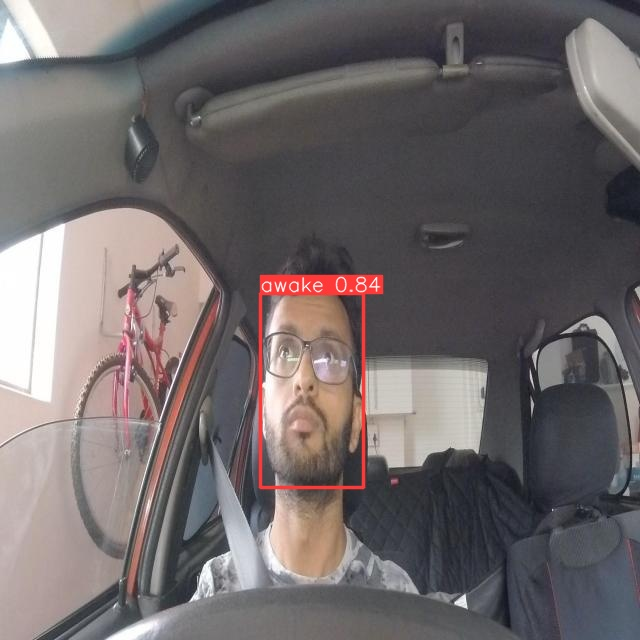

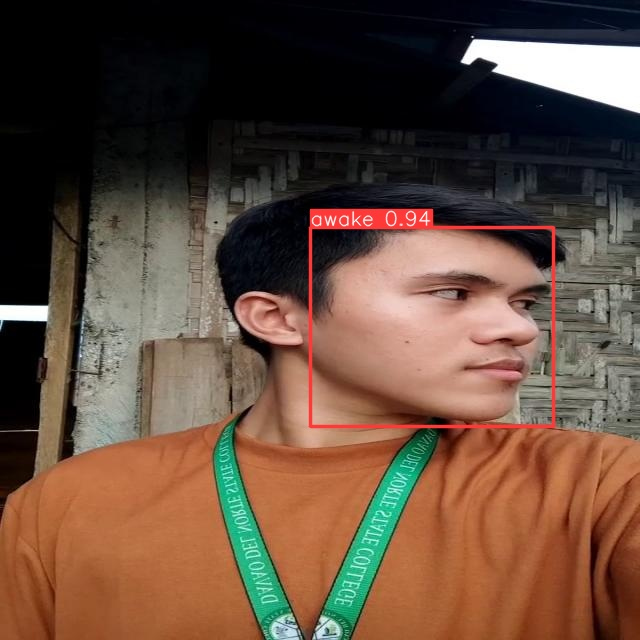

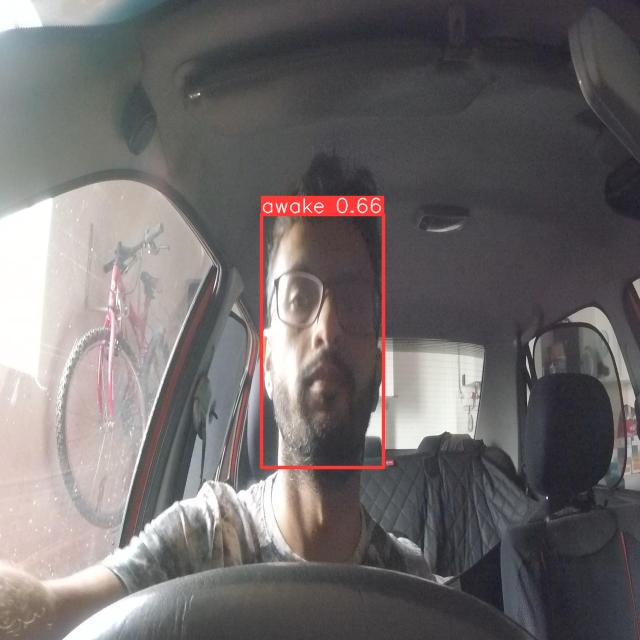

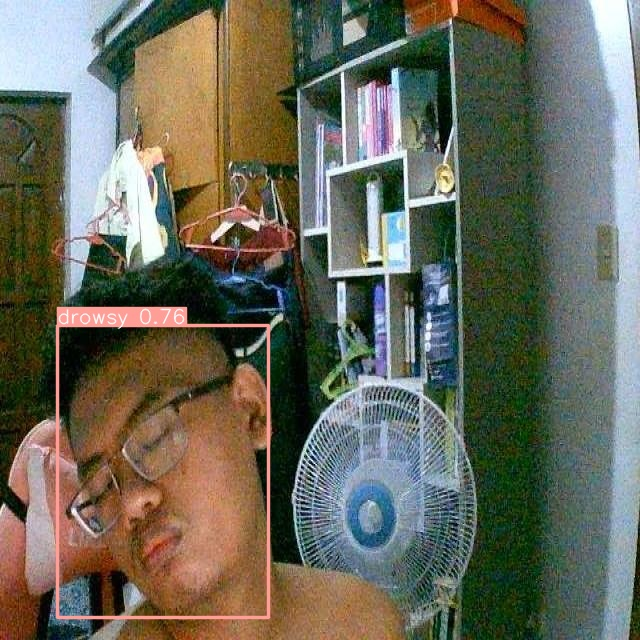

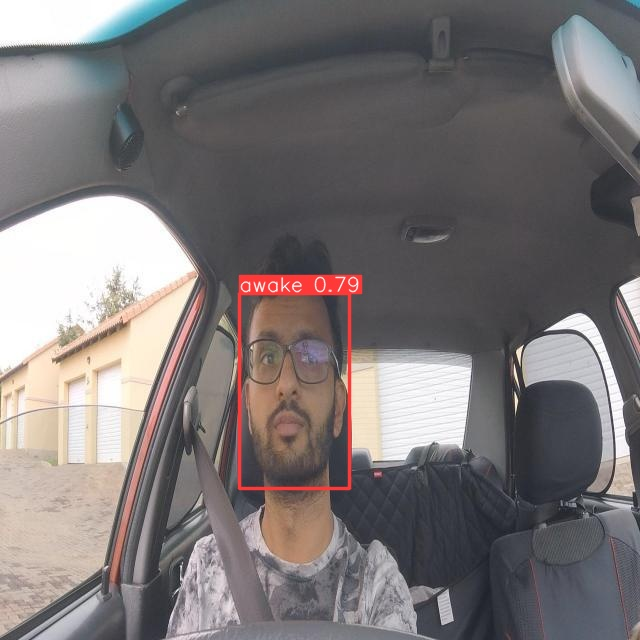

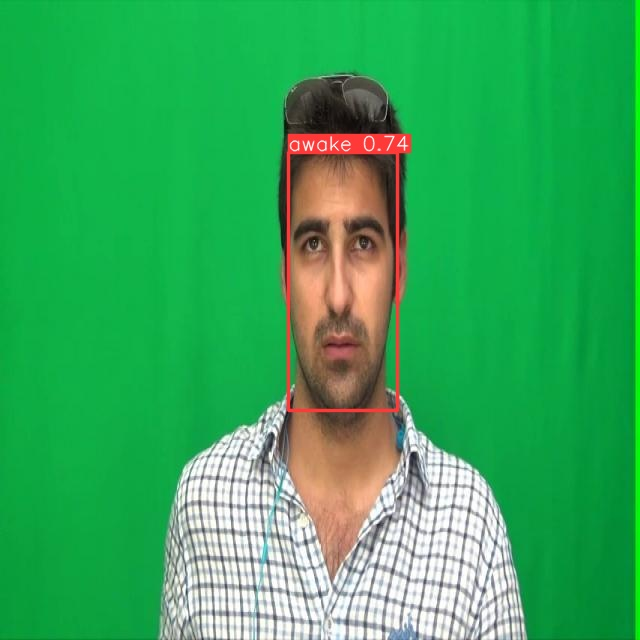

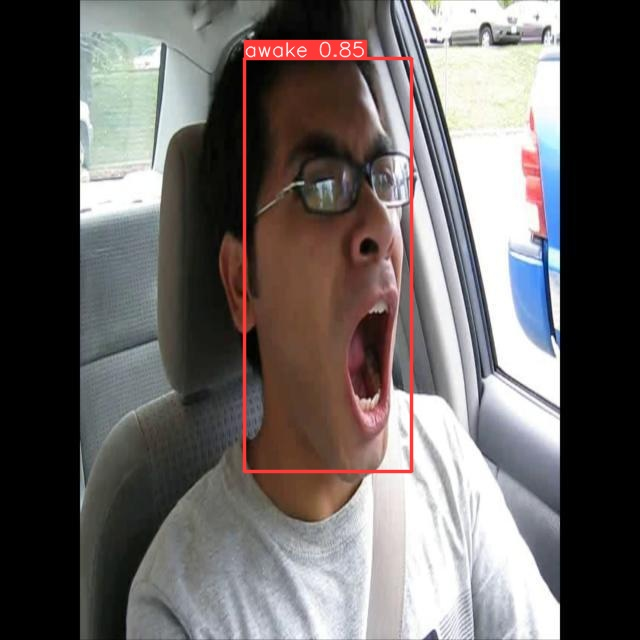

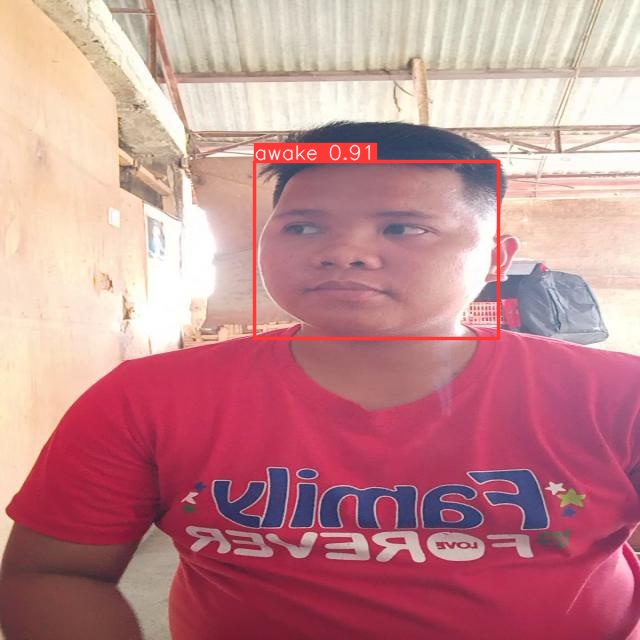

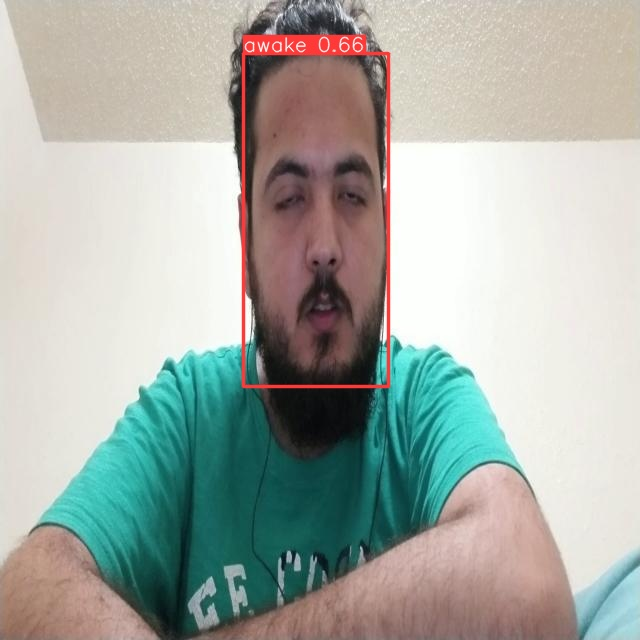

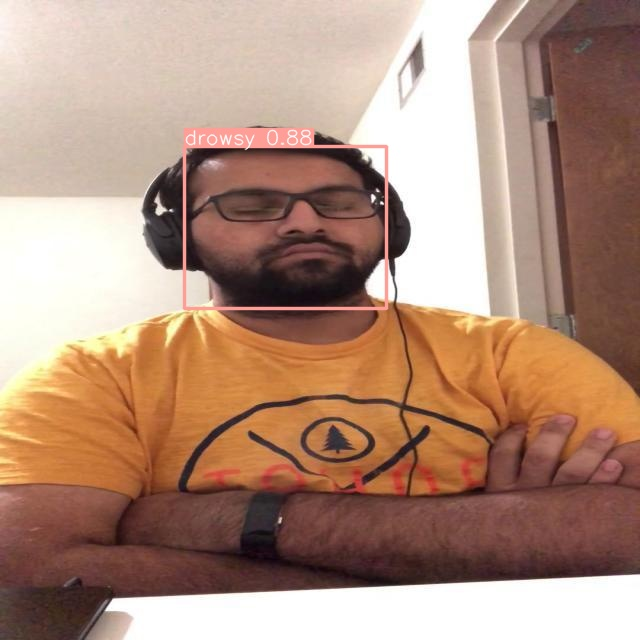

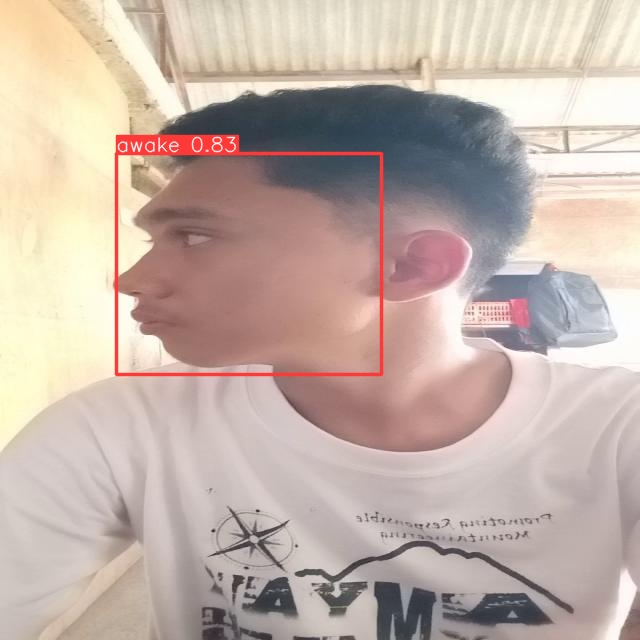

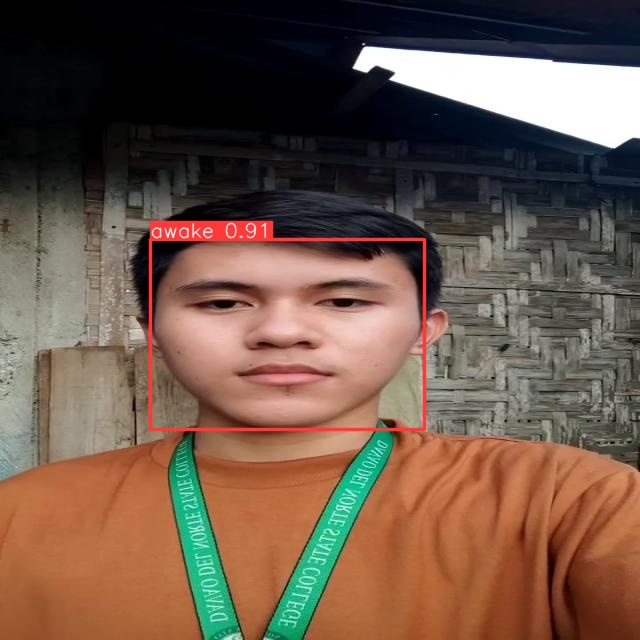

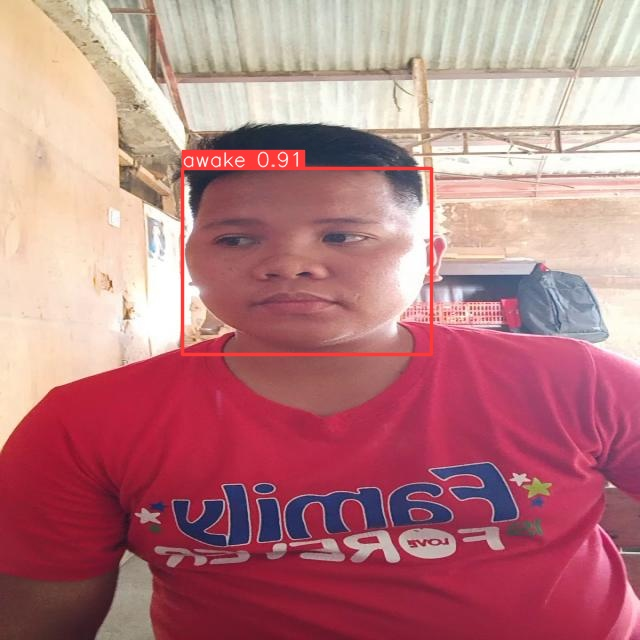

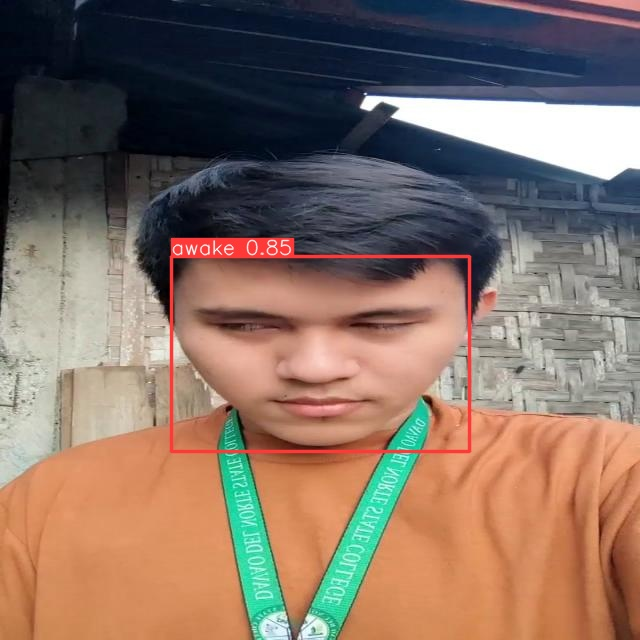

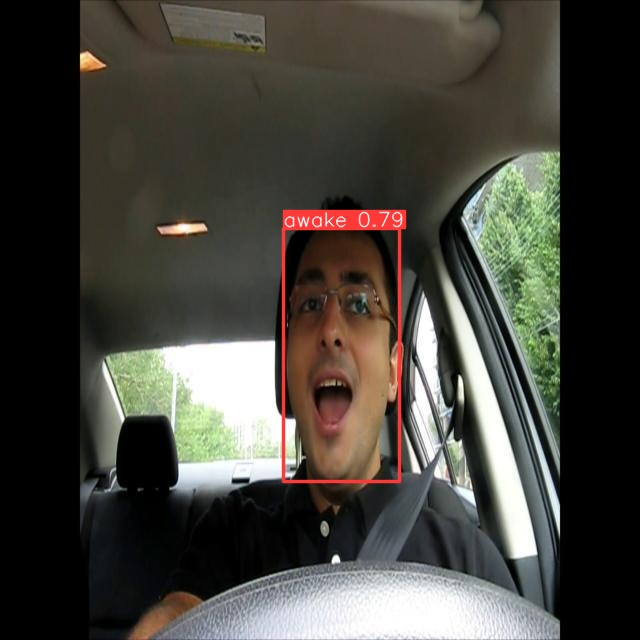

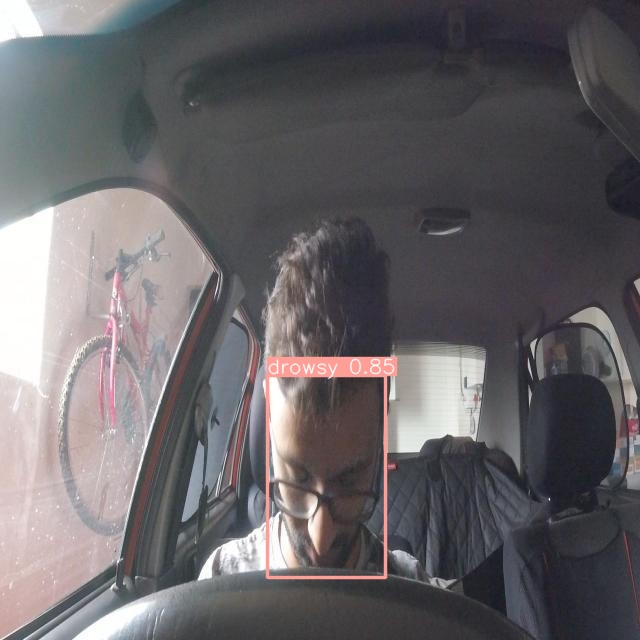

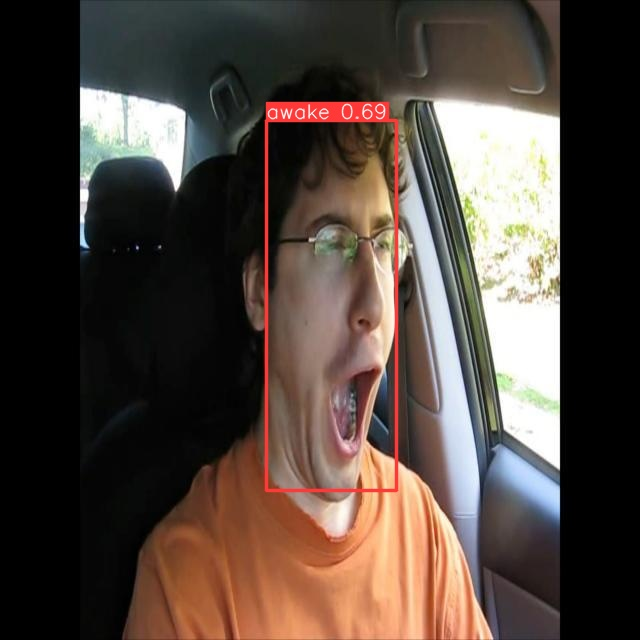

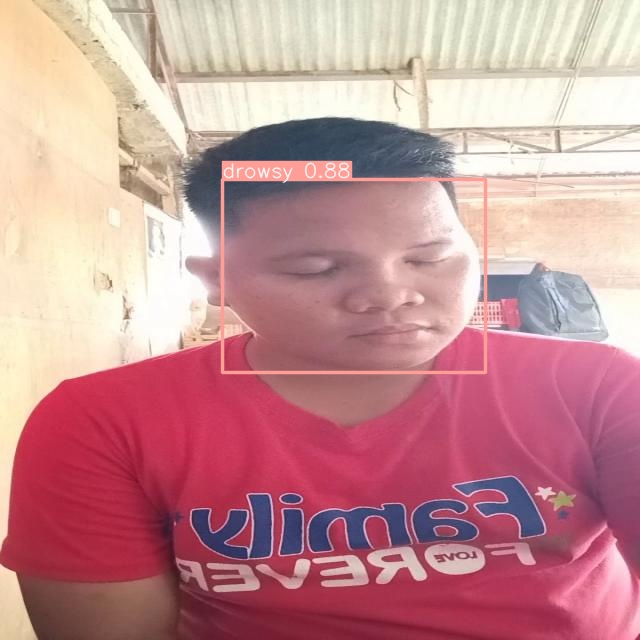

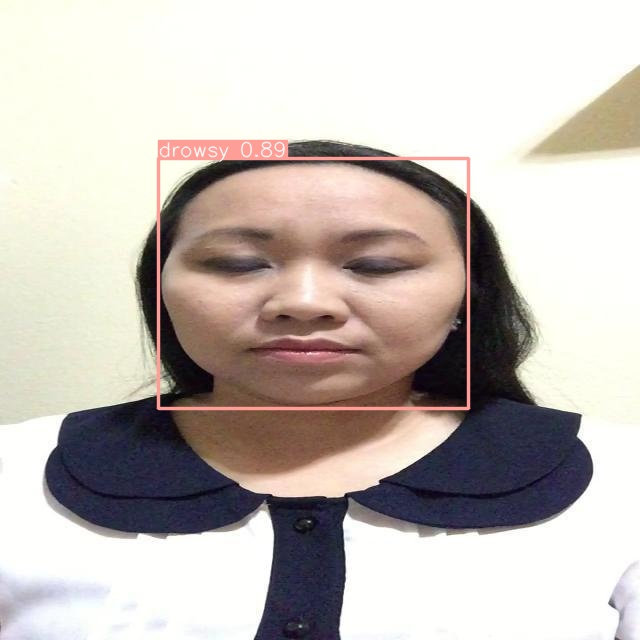

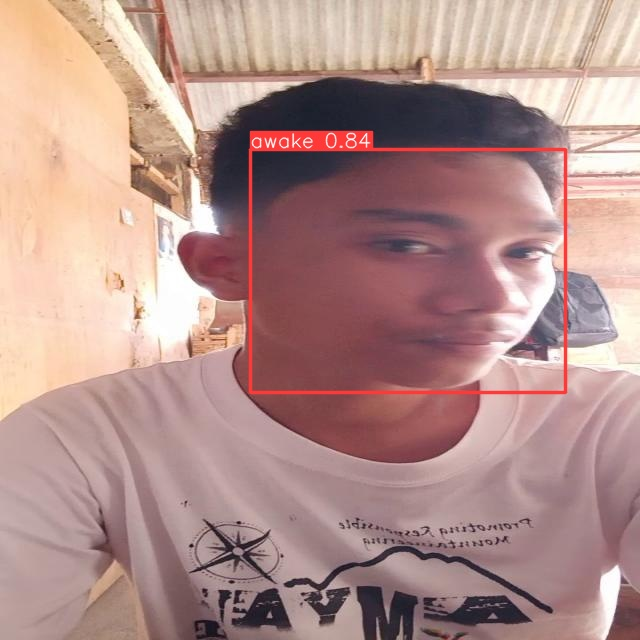

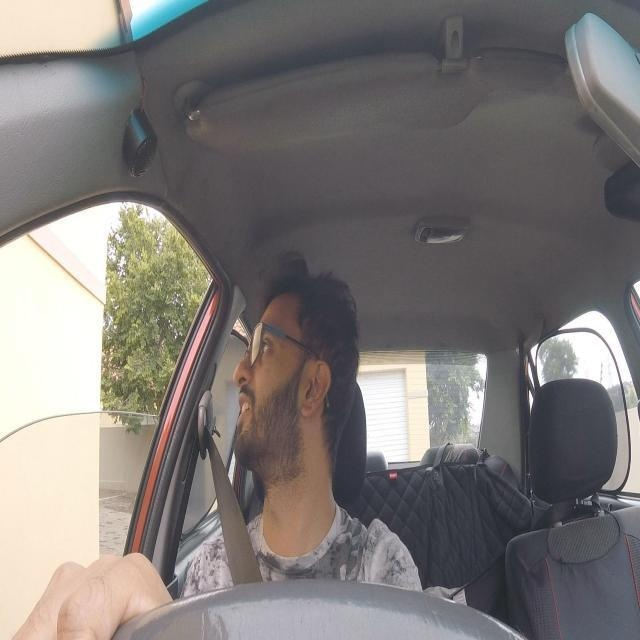

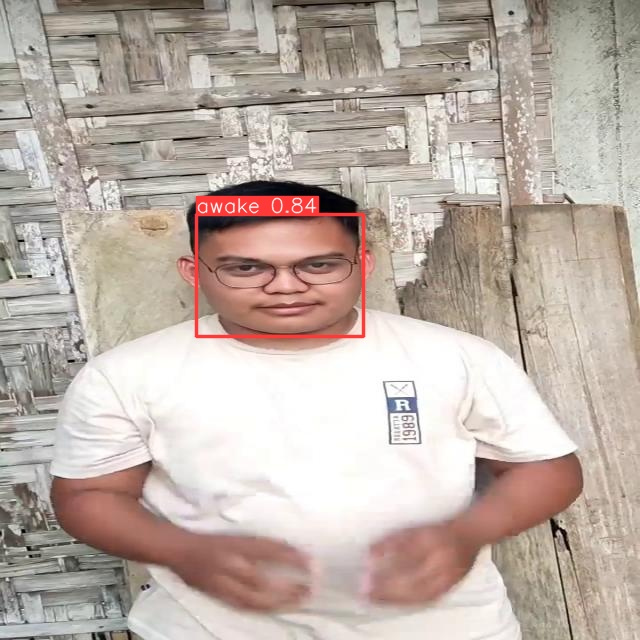

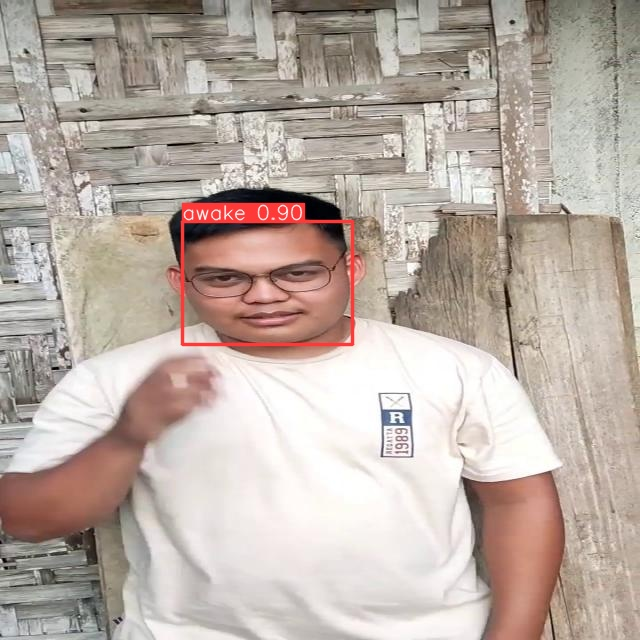

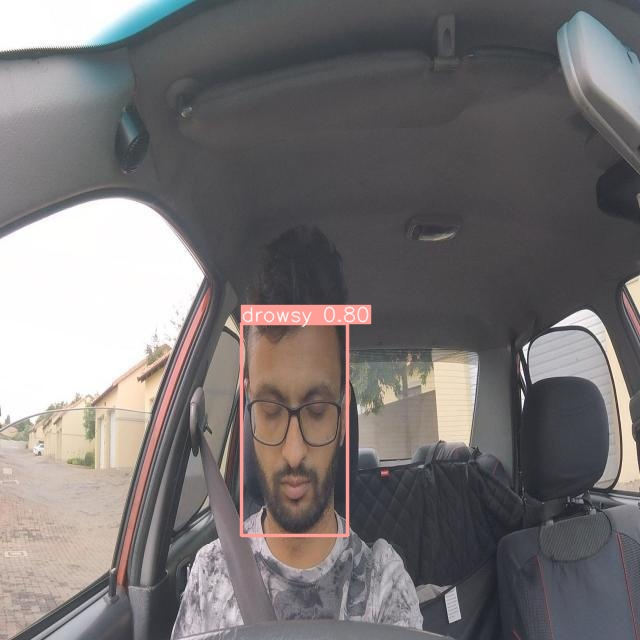

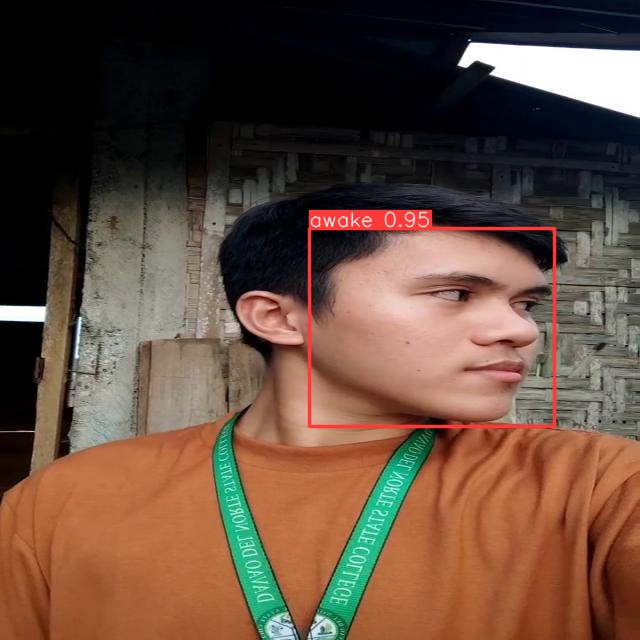

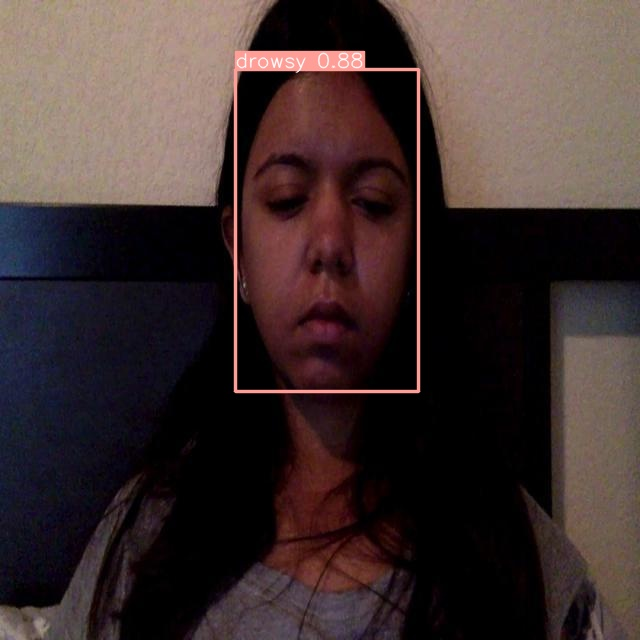

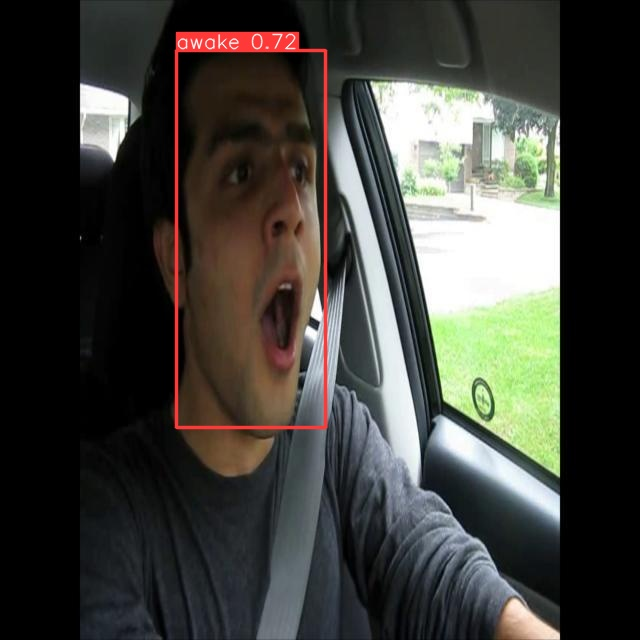

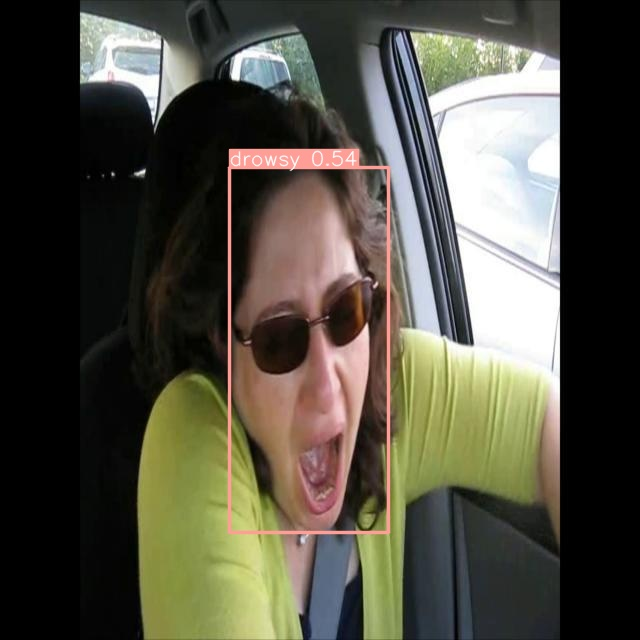

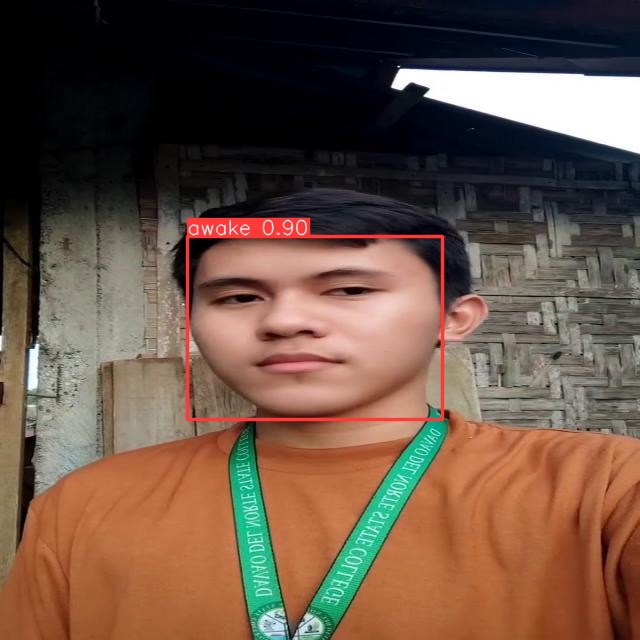

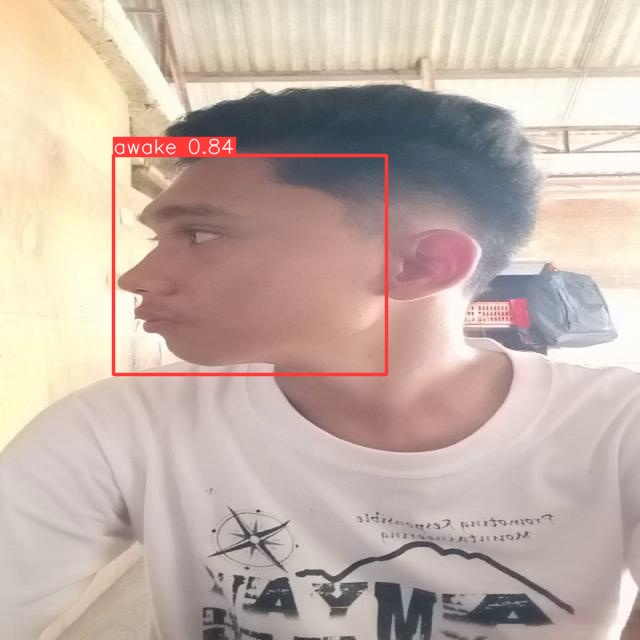

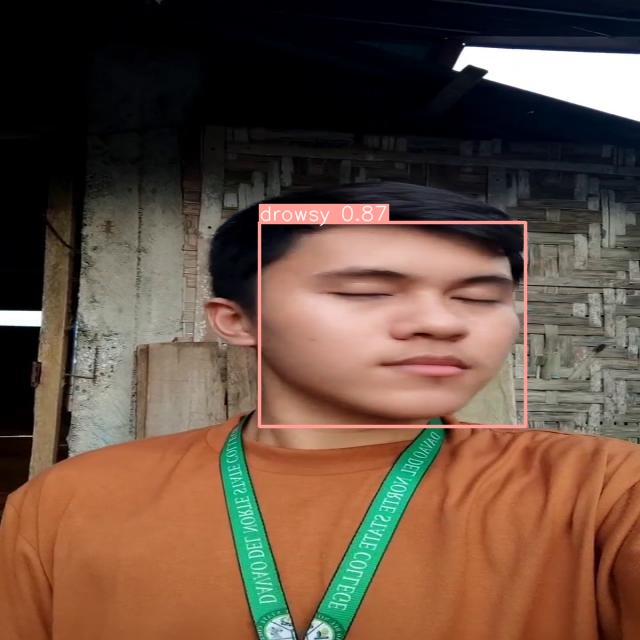

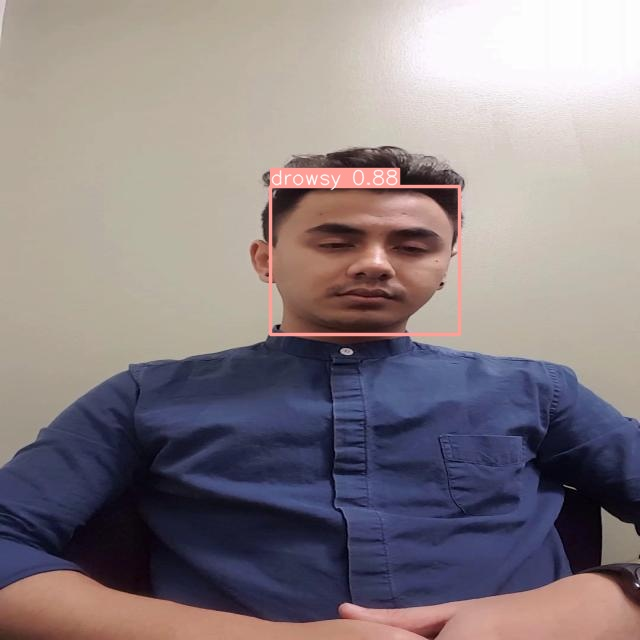

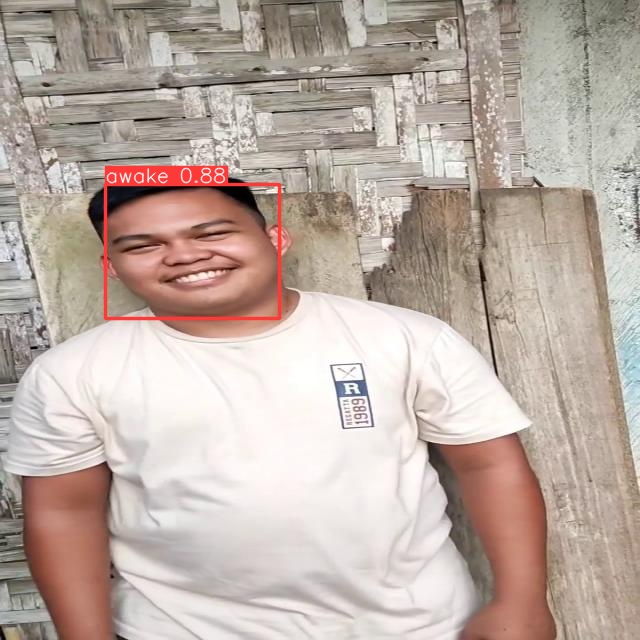

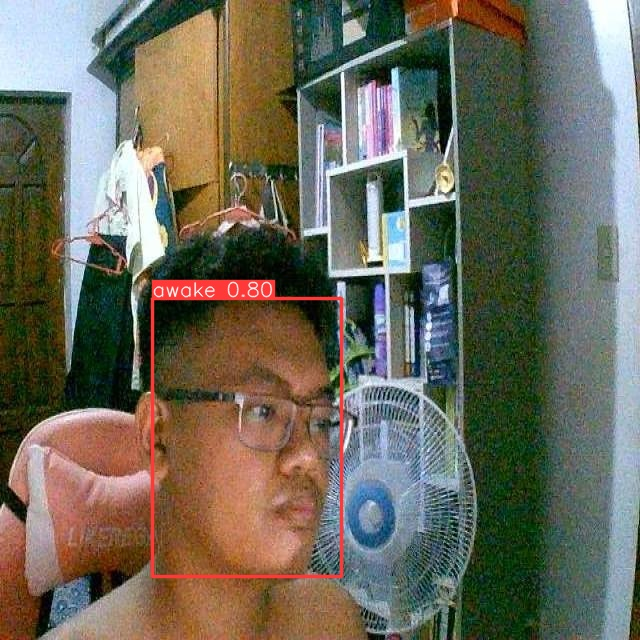

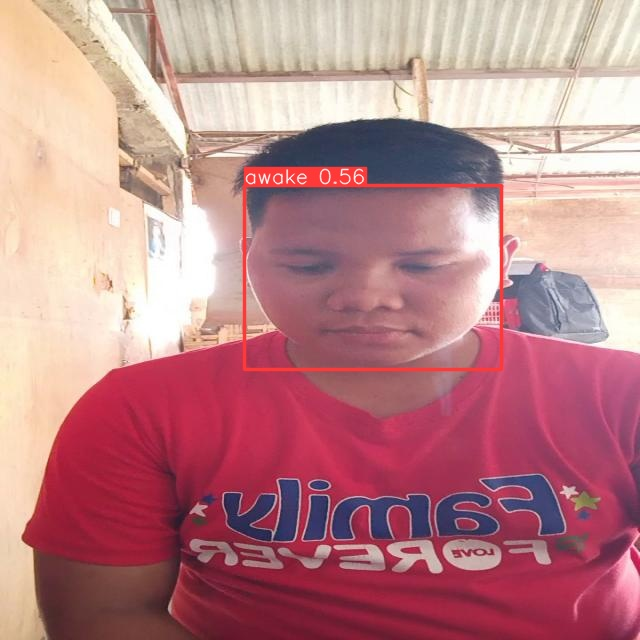

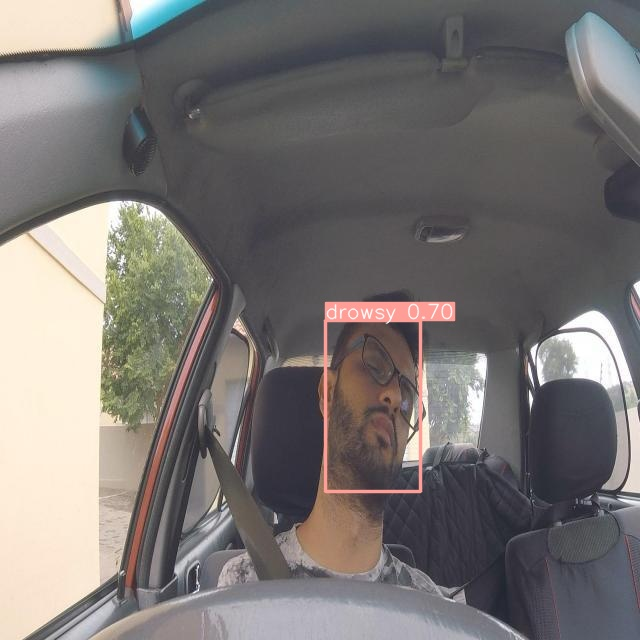

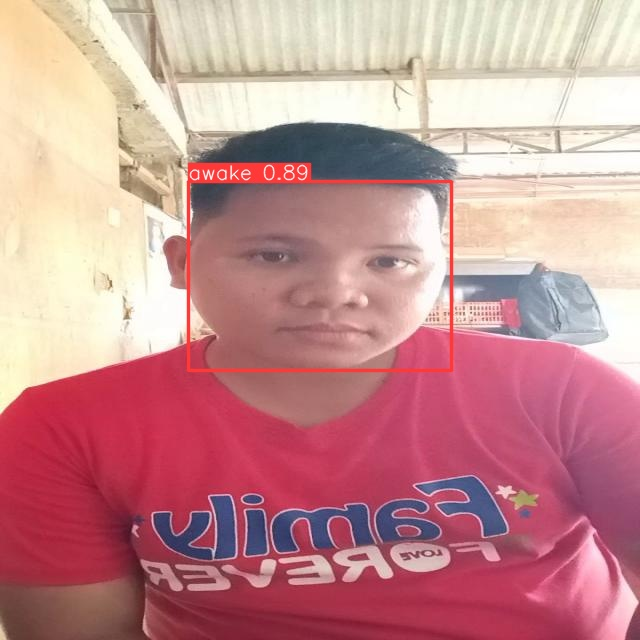

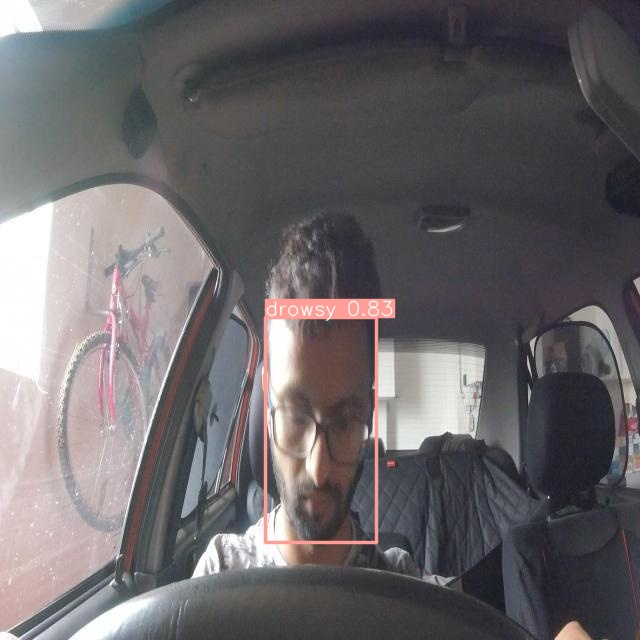

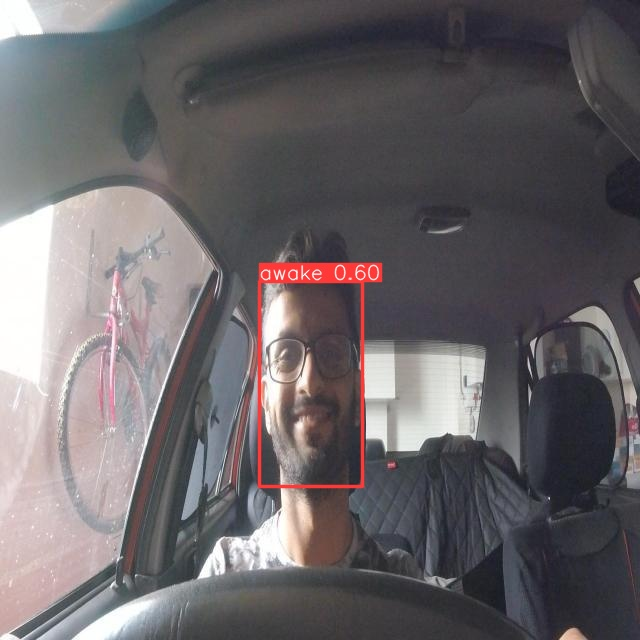

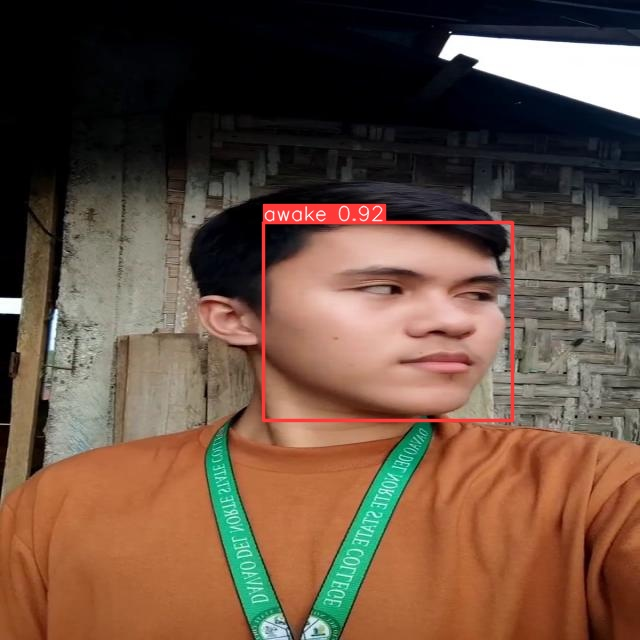

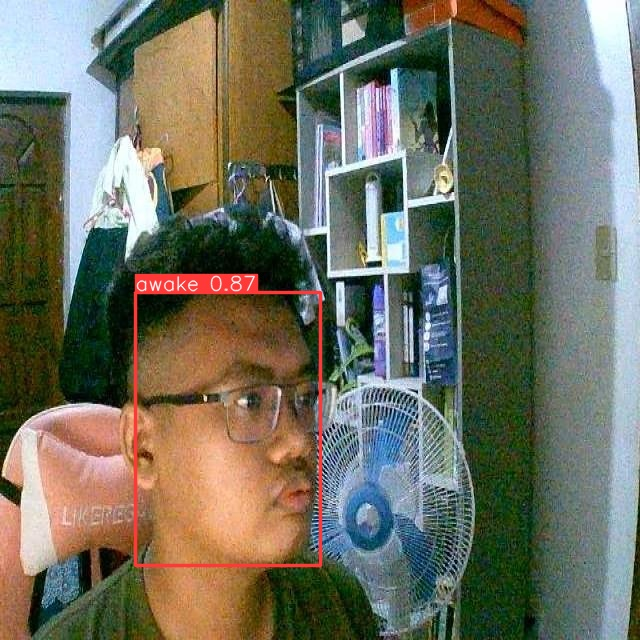

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict7/*.jpg'):
  display(Image(filename= image_path, height = 600))
  print("\n")